# Compare Gradient Descent and Linear Regression (Closed form Solution) 

- y = 2x + 5 + $\epsilon_{i}$, $\epsilon$ ~ N(0,$\sigma^2$)
- $\sigma = 5 $

## Generate Data

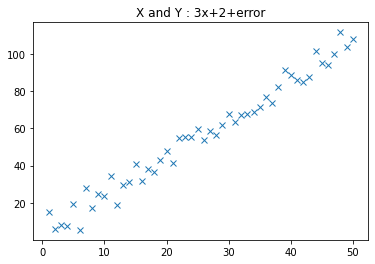

X: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
y: [ 15.12172682   5.94121793   8.35914124   7.63515689  19.32703815
   5.49230652  27.72405882  17.1939655   24.59519548  23.75314812
  34.31053969  18.69929645  29.38791398  31.07972823  40.66884721
  31.50054366  38.13785896  36.61070791  43.21106873  47.91407607
  41.49690411  54.72361855  55.5079536   55.51247169  59.50427975
  53.5813607   58.38554887  56.32115283  61.6605596   67.65177733
  63.54169624  67.01623237  67.5641365   68.77397179  71.64376935
  76.93667701  73.41344826  82.17207849  91.29901089  88.7102208
  86.04082224  84.56185518  87.26420853 101.46227301  95.25403877
  93.81502177  99.95457742 111.50127568 103.60079476 108.08601555]


In [443]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
np.random.seed(1)
X = np.array([i for i in range(1,51)])
error = np.random.normal(0,5,50)
y = 2*X + 5 +error
plt.plot(X,y,'x')
plt.title('X and Y : 3x+2+error')
plt.show()
print('X:',X)
print('y:',y)

- ## Gradient Descent Algorithm
- $ MSE = \frac{1}{n}\sum(y_i - (mx_i + b))^2 $
- $ \frac{dMSE}{dm} = \frac{2}{n}\sum -x_i(y_i - (mx_i + b)) $
- $ \frac{dMSE}{db} = \frac{2}{n}\sum -(y_i - (mx_i + b)) $
- $m = m - learningRate*\frac{dMSE}{dm} $
- $b = b - learningRate*\frac{dMSE}{db} $

In [448]:
def Gradient_Descent(X,y):
    m = 1
    b = 1
    n = len(X)
    iters = 3000
    learning_rate = 0.0001
    threshold_toStop = 0.0001
    cost =  []
    m_slope = []
    b_intercept = []
    plt.scatter(X,y)
    for i in range(iters):
        y_predict = m*X + b
        J = np.sum(y-y_predict)
        dm = -(2/n)*sum(X*(y-y_predict))
        db = -(2/n)*sum(y-y_predict)
        m = m - dm*learning_rate
        b = m - db*learning_rate
        cost.append(J)
        m_slope.append(m)
        b_intercept.append(b)
        if i == iters-1:
            plt.plot(X,y_predict,'red',linestyle='-.',alpha=0.9,linewidth=3,label='Prediction Line from Gradient Descent Algo')
        else:
            plt.plot(X,y_predict,'b',linestyle='--',alpha=0.5)
    plt.legend(loc='best')
    return m_slope,b_intercept,cost

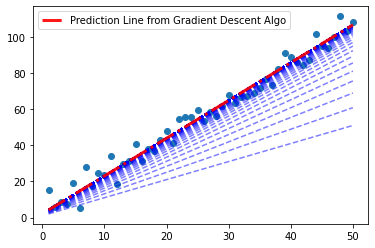

In [449]:
m,b,cost = Gradient_Descent(X,y)

In [276]:
print(m[-1])
print(b[-1])
print(cost[-1])

2.092633128815362
2.0927166416820597
20.87821667439774


# Linear Equation from Gradient Descent

y_predict_Gradient = 2.09271 + 2.09263X

In [454]:
y_predict_Gradient = m[-1]*X + b[-1]
y_predict_Gradient = y_predict_Gradient.reshape(-1,1)

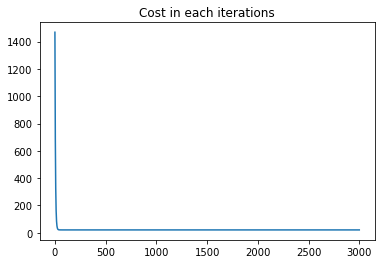

In [455]:
plt.plot(cost)
plt.title('Cost in each iterations')
plt.show()

# Linear Regression
- $ y = X\beta^T + error $
- $ y = \beta_0 + \beta_1X + \epsilon $

- $ \beta = (X^TX)^{-1}X^Ty $

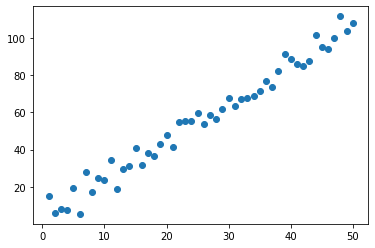

In [460]:
np.random.seed(1)
n = 50 # number of observation
X = np.array([i for i in range(1,51)]).reshape(n,1)
_ = np.array([1 for i in range(n)]).reshape(n,1)
X = np.concatenate((_,X),axis=1)
error = np.random.normal(0,5,n)
beta = np.array([[5,2]])
y = np.dot(X,beta.T) + error.reshape(50,1)
plt.scatter(X[:,1],y)
plt.show()

In [420]:
beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
beta_hat

array([[3.8141043],
       [2.0415028]])

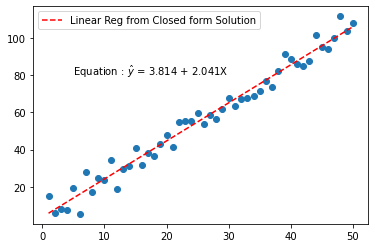

In [434]:
y_predict_closeForm = np.dot(X,beta_hat)
plt.scatter(X[:,1],y)
plt.plot(X[:,1],y_predict_closeForm,linestyle='--',color='red',label='Linear Reg from Closed form Solution')
plt.legend(loc='best')
plt.text(5,80,'Equation : $\haty $ = 3.814 + 2.041X')
plt.show()


# Compare MSE of Gradient Descent Algo and Closed form Linear

In [436]:
def cost_fn(y,y_predict):
    cost = (1/n)*np.sum((y-y_predict)**2)
    return cost

In [459]:
print('MSE of GradDesc: ', cost_fn(y,y_predict_Gradient))
print('MSE of Linear Alg: ', cost_fn(y,y_predict_closeForm))

MSE of GradDesc:  90159.95733556524
MSE of Linear Alg:  87950.24800080694
